In [26]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization


In [6]:
train_data=pd.read_csv("fashion-mnist_train.csv")
test_data=pd.read_csv("fashion-mnist_test.csv")

In [7]:
img_rows,img_cols=28,28
input_shape=(img_rows,img_cols,1)

# column 1 is label and 784 columns contains the pixel values
X = np.array(train_data.iloc[:, 1:])
y = to_categorical(np.array(train_data.iloc[:, 0]))

In [12]:
# splitting on train, validation and test set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=7)

X_test=np.array(test_data.iloc[:,1:])
y_test=to_categorical(np.array(test_data.iloc[:,0]))


In [13]:
print X_train.shape


(45000, 784)


In [14]:
#reshaping the array into (no. of rows, img_rows, img_cols, 1)
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_train=X_train.astype('float32')
X_train=X_train/255
X_valid=X_valid.reshape(X_valid.shape[0],img_rows,img_cols,1)
X_valid=X_valid.astype('float32')
X_valid=X_valid/255
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_test=X_test.astype('float32')
X_test=X_test/255

In [16]:
batch_size=256
num_classes=10
epochs=10


In [20]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_fit=model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, validation_data=(X_valid,y_valid))

Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 29s - loss: 0.5895 - acc: 0.7971 - val_loss: 0.3753 - val_acc: 0.8663
Epoch 2/10
45000/45000 [==============================] - 30s - loss: 0.3624 - acc: 0.8728 - val_loss: 0.3157 - val_acc: 0.8850
Epoch 3/10
45000/45000 [==============================] - 24s - loss: 0.3128 - acc: 0.8897 - val_loss: 0.2926 - val_acc: 0.8949
Epoch 4/10
45000/45000 [==============================] - 27s - loss: 0.2807 - acc: 0.8994 - val_loss: 0.2789 - val_acc: 0.8973
Epoch 5/10
45000/45000 [==============================] - 21s - loss: 0.2579 - acc: 0.9073 - val_loss: 0.2631 - val_acc: 0.9041
Epoch 6/10
45000/45000 [==============================] - 33s - loss: 0.2390 - acc: 0.9145 - val_loss: 0.2475 - val_acc: 0.9093
Epoch 7/10
45000/45000 [==============================] - 22s - loss: 0.2225 - acc: 0.9207 - val_loss: 0.2424 - val_acc: 0.9123
Epoch 8/10
45000/45000 [==============================

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)

In [24]:
print score

[0.2281910673379898, 0.91749999999999998]


In [25]:
print "loss:", score[0]
print "accuracy:",score[1]

loss: 0.228191067338
accuracy: 0.9175


# Plotting accuracy and loss

In [28]:
acc=model_fit.history['acc']
validation_acc=model_fit.history['val_acc']
loss=model_fit.history['loss']
validation_loss=model_fit.history['val_loss']

print acc, validation_acc, loss, validation_loss

[0.7971111109945509, 0.87277777773539222, 0.8896666667620341, 0.89937777789433793, 0.90728888892067805, 0.91453333331214059, 0.92066666653951013, 0.92591111120647851, 0.93046666669845579, 0.93384444449742632] [0.86633333342870078, 0.88500000028610226, 0.89486666660308833, 0.89733333317438757, 0.90413333326975509, 0.90926666644414267, 0.91233333336512246, 0.9122666666984558, 0.91413333361943561, 0.91653333336512244] [0.58953860049777562, 0.36236501740879484, 0.31279744767083062, 0.28066423344082303, 0.25792376804351808, 0.23903602223926121, 0.22254652973281014, 0.20640983946853214, 0.19228208565976884, 0.18206696329646641] [0.37528108587265013, 0.31574039835929868, 0.29263302060763041, 0.27888503290812172, 0.26313966143925982, 0.24745152467091877, 0.24241385873953503, 0.23940413266817728, 0.23416090569496154, 0.23583941552639007]


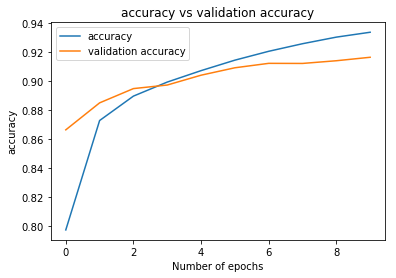

In [36]:
x_axis=range(epochs)
plt.plot(x_axis,acc,label="accuracy")
plt.plot(x_axis,validation_acc,label="validation accuracy")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("accuracy")
plt.title("accuracy vs validation accuracy")

plt.show()

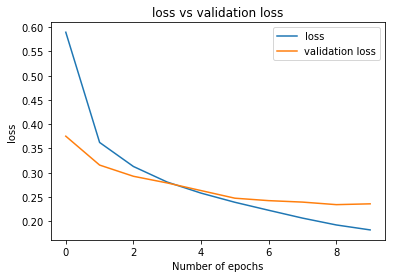

In [37]:
x_axis=range(epochs)
plt.plot(x_axis,loss,label="loss")
plt.plot(x_axis,validation_loss,label="validation loss")
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("loss")
plt.title("loss vs validation loss")

plt.show()